# Data Exploration

## Library imports

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import importlib 

from pathlib import Path 

In [83]:
# import other libraries 
# check if jcds library is installed
package_name = "jcds"

if importlib.util.find_spec(package_name) is None:
    print(f" '{package_name}' not found. Installing from Github... ")
    subprocess.check_call(
        [
            sys.executable,
            "-m",
            "pip",
            "install",
            "https://github.com/junclemente/jcds.git",
        ]
    )
else:
    print(f" '{package_name}' is already installed.")

from jcds import eda as jeda
from jcds import reports as jrep

 'jcds' is already installed.


## Import dataset

In [84]:
data_folder = Path("../data")

df = pd.read_pickle(data_folder / "ews_dataset.pkl")

df.head()

,virtual,magnet,yearroundyn,multilingual,cohortstudents,regular_hs_diploma_graduates_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,N,N,N,N,394.0,92.4,73.9,22.8,2.3,1.0,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,N,N,N,N,284.0,95.1,67.8,21.5,3.5,0.0,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,N,N,N,Y,861.0,90.5,62.3,12.1,8.1,0.8,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,N,N,N,N,672.0,96.4,72.8,25.0,2.2,0.0,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,V,N,N,N,31.0,100.0,64.5,6.5,0.0,0.0,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


## Basic dataset info

In [85]:
jrep.data_info(df, show_columns=True)


SHAPE:
There are 1067 rows and 42 columns (0.55 MB).

DUPLICATES:
There are 6 duplicated rows.

COLUMNS/VARIABLES:
Column dType Summary:
 * object: 4
 * float: 38
There are 38 numerical (int/float/bool) variables.
 * Columns: ['cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 'dropout_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'eligible_cumulative_enrollment', 'unexcused_absences_percent', 'outofschool_suspension_absences_percent', 'percent__eligible_free_k12', 'frpm_count_k12', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_inexperienced', 'pct_first_year', 'pct_second_year', 'grade_retention_ratio', 'pct_hs_enrollment', 'pct_senior_cohort', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'avg_safety_score', 'high_conn', 'low_conn', 'co

In [86]:
jrep.data_cardinality(df, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 42

[BINARY COLUMNS]
There are 1 binary columns.
 * Columns: ['yearroundyn']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 3 constant columns.
 * Columns: ['high_conn', 'low_conn', 'conn_ratio']
There are 7 near-constant columns with >= 95% of values being the same.
 * Columns: ['yearroundyn', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'high_conn', 'low_conn', 'conn_ratio']

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 4 low cardinality columns with <= 10 unique values.
Columns:
 * virtual: 3 unique values
 * magnet: 3 unique values
 * yearroundyn: 2 unique values
 * multilingual: 3 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 0 high cardinality variables with >=90% unique values.


In [90]:
jrep.data_quality(df, show_columns=True)

DATA QUALITY REPORT

 * Total entries (rows * cols): 44814
 * Memory usage: 0.55 MB
 * Rows: 1067
 * Columns: 42

MISSING DATA:
 * Total entries: 5860 missing (13.1%)

ROWS:
----------
 * Rows missing any: 1067
 * Rows missing all: 0

DUPLICATES: 6

COLUMNS:
----------------
Columns missing any: 35
	'stu_adm_ratio': 1037 missing (97.2%)
	'stu_psv_ratio': 1037 missing (97.2%)
	'stu_tch_ratio': 1025 missing (96.1%)
	'pct_unsafe_gr11': 172 missing (16.1%)
	'pct_safe_gr11': 172 missing (16.1%)
	'pct_neutral_gr11': 172 missing (16.1%)
	'avg_safety_score': 123 missing (11.5%)
	'school_climate_index': 123 missing (11.5%)
	'pct_associate': 96 missing (9.0%)
	'pct_bachelors': 96 missing (9.0%)
	'pct_bachelors_plus': 96 missing (9.0%)
	'pct_master': 96 missing (9.0%)
	'pct_master_plus': 96 missing (9.0%)
	'pct_doctorate': 96 missing (9.0%)
	'pct_juris_doctor': 96 missing (9.0%)
	'pct_no_degree': 96 missing (9.0%)
	'pct_experienced': 96 missing (9.0%)
	'pct_inexperienced': 96 missing (9.0%)
	'pct

In [ ]:
# list features and target
target = "regular_hs_diploma_graduates_rate"
num_cols = ['cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 'dropout_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'eligible_cumulative_enrollment', 'unexcused_absences_percent', 'outofschool_suspension_absences_percent', 'percent__eligible_free_k12', 'frpm_count_k12', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_inexperienced', 'pct_first_year', 'pct_second_year', 'grade_retention_ratio', 'pct_hs_enrollment', 'pct_senior_cohort', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'avg_safety_score', 'high_conn', 'low_conn', 'conn_ratio', 'school_climate_index']

cat_cols = ['virtual', 'magnet', 'yearroundyn', 'multilingual']

In [91]:
df[num_cols].head(10)

,cohortstudents,regular_hs_diploma_graduates_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,chronicabsenteeismrate,eligible_cumulative_enrollment,unexcused_absences_percent,outofschool_suspension_absences_percent,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,394.0,92.4,73.9,22.8,2.3,1.0,12.7,1841.0,23.5,0.5,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,284.0,95.1,67.8,21.5,3.5,0.0,70.3,1192.0,46.2,0.4,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,861.0,90.5,62.3,12.1,8.1,0.8,5.2,3281.0,24.1,0.0,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,672.0,96.4,72.8,25.0,2.2,0.0,3.5,2771.0,28.0,0.9,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,31.0,100.0,64.5,6.5,0.0,0.0,8.3,420.0,19.1,3.8,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
5,40.0,95.0,76.3,0.0,5.0,0.0,29.6,186.0,67.9,0.0,...,1.00000,0.545455,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
6,574.0,94.4,73.6,19.0,3.3,0.0,2.3,2550.0,10.8,1.1,...,1.00000,0.500397,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
7,548.0,95.1,75.0,30.3,4.4,0.0,2.1,2345.0,22.2,0.8,...,1.00000,0.497624,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
8,350.0,91.1,26.0,13.8,7.7,0.0,4.6,1370.0,20.8,1.2,...,1.00000,0.513699,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
9,485.0,96.5,67.9,38.0,2.1,0.0,1.4,1984.0,4.5,0.3,...,1.00000,0.526129,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


In [92]:
df[cat_cols].head(10)

,virtual,magnet,yearroundyn,multilingual
0,N,N,N,N
1,N,N,N,N
2,N,N,N,Y
3,N,N,N,N
4,V,N,N,N
5,N,N,N,N
6,N,N,N,N
7,N,Y,N,N
8,N,N,N,N
9,N,N,N,N


# Univariate Analysis

## Numerical Features

In [93]:
df_num = df[num_cols].copy()

In [94]:
df_num.describe()

,cohortstudents,regular_hs_diploma_graduates_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,chronicabsenteeismrate,eligible_cumulative_enrollment,unexcused_absences_percent,outofschool_suspension_absences_percent,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,1021.000000,1020.000000,1020.000000,1020.000000,...,1028.000000,1028.000000,895.000000,895.000000,895.000000,944.000000,1067.000000,1067.000000,1.067000e+03,944.000000
mean,362.837538,91.869828,52.392230,15.166700,4.551968,1.590111,14.960627,1607.253922,40.230980,1.100882,...,0.983842,0.473472,0.084221,0.571122,0.344709,0.034474,0.333333,0.333333,9.999970e-01,0.517237
std,199.102377,7.276695,18.941886,12.809108,4.912416,3.668865,14.895006,868.227320,17.844221,0.953445,...,0.088032,0.066638,0.019620,0.053103,0.038252,0.001868,0.000000,0.000000,1.110744e-16,0.000934
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,...,0.000000,0.000000,0.039000,0.404000,0.200000,0.031287,0.333333,0.333333,9.999970e-01,0.515643
25%,200.000000,89.300000,40.350000,5.350000,1.300000,0.000000,4.700000,904.000000,27.600000,0.400000,...,1.000000,0.459631,0.073000,0.542000,0.331000,0.033623,0.333333,0.333333,9.999970e-01,0.516812
50%,376.000000,93.800000,53.000000,13.700000,3.000000,0.800000,11.000000,1696.000000,38.200000,0.900000,...,1.000000,0.482263,0.083000,0.565000,0.352000,0.034217,0.333333,0.333333,9.999970e-01,0.517108
75%,500.500000,96.600000,65.250000,22.300000,6.300000,2.000000,20.200000,2217.000000,50.225000,1.525000,...,1.000000,0.500000,0.089000,0.586000,0.358000,0.034490,0.333333,0.333333,9.999970e-01,0.517245
max,1044.000000,100.000000,100.000000,84.700000,38.500000,96.300000,85.000000,4742.000000,99.900000,8.900000,...,1.000000,1.000000,0.168000,0.760000,0.436000,0.042390,0.333333,0.333333,9.999970e-01,0.521195


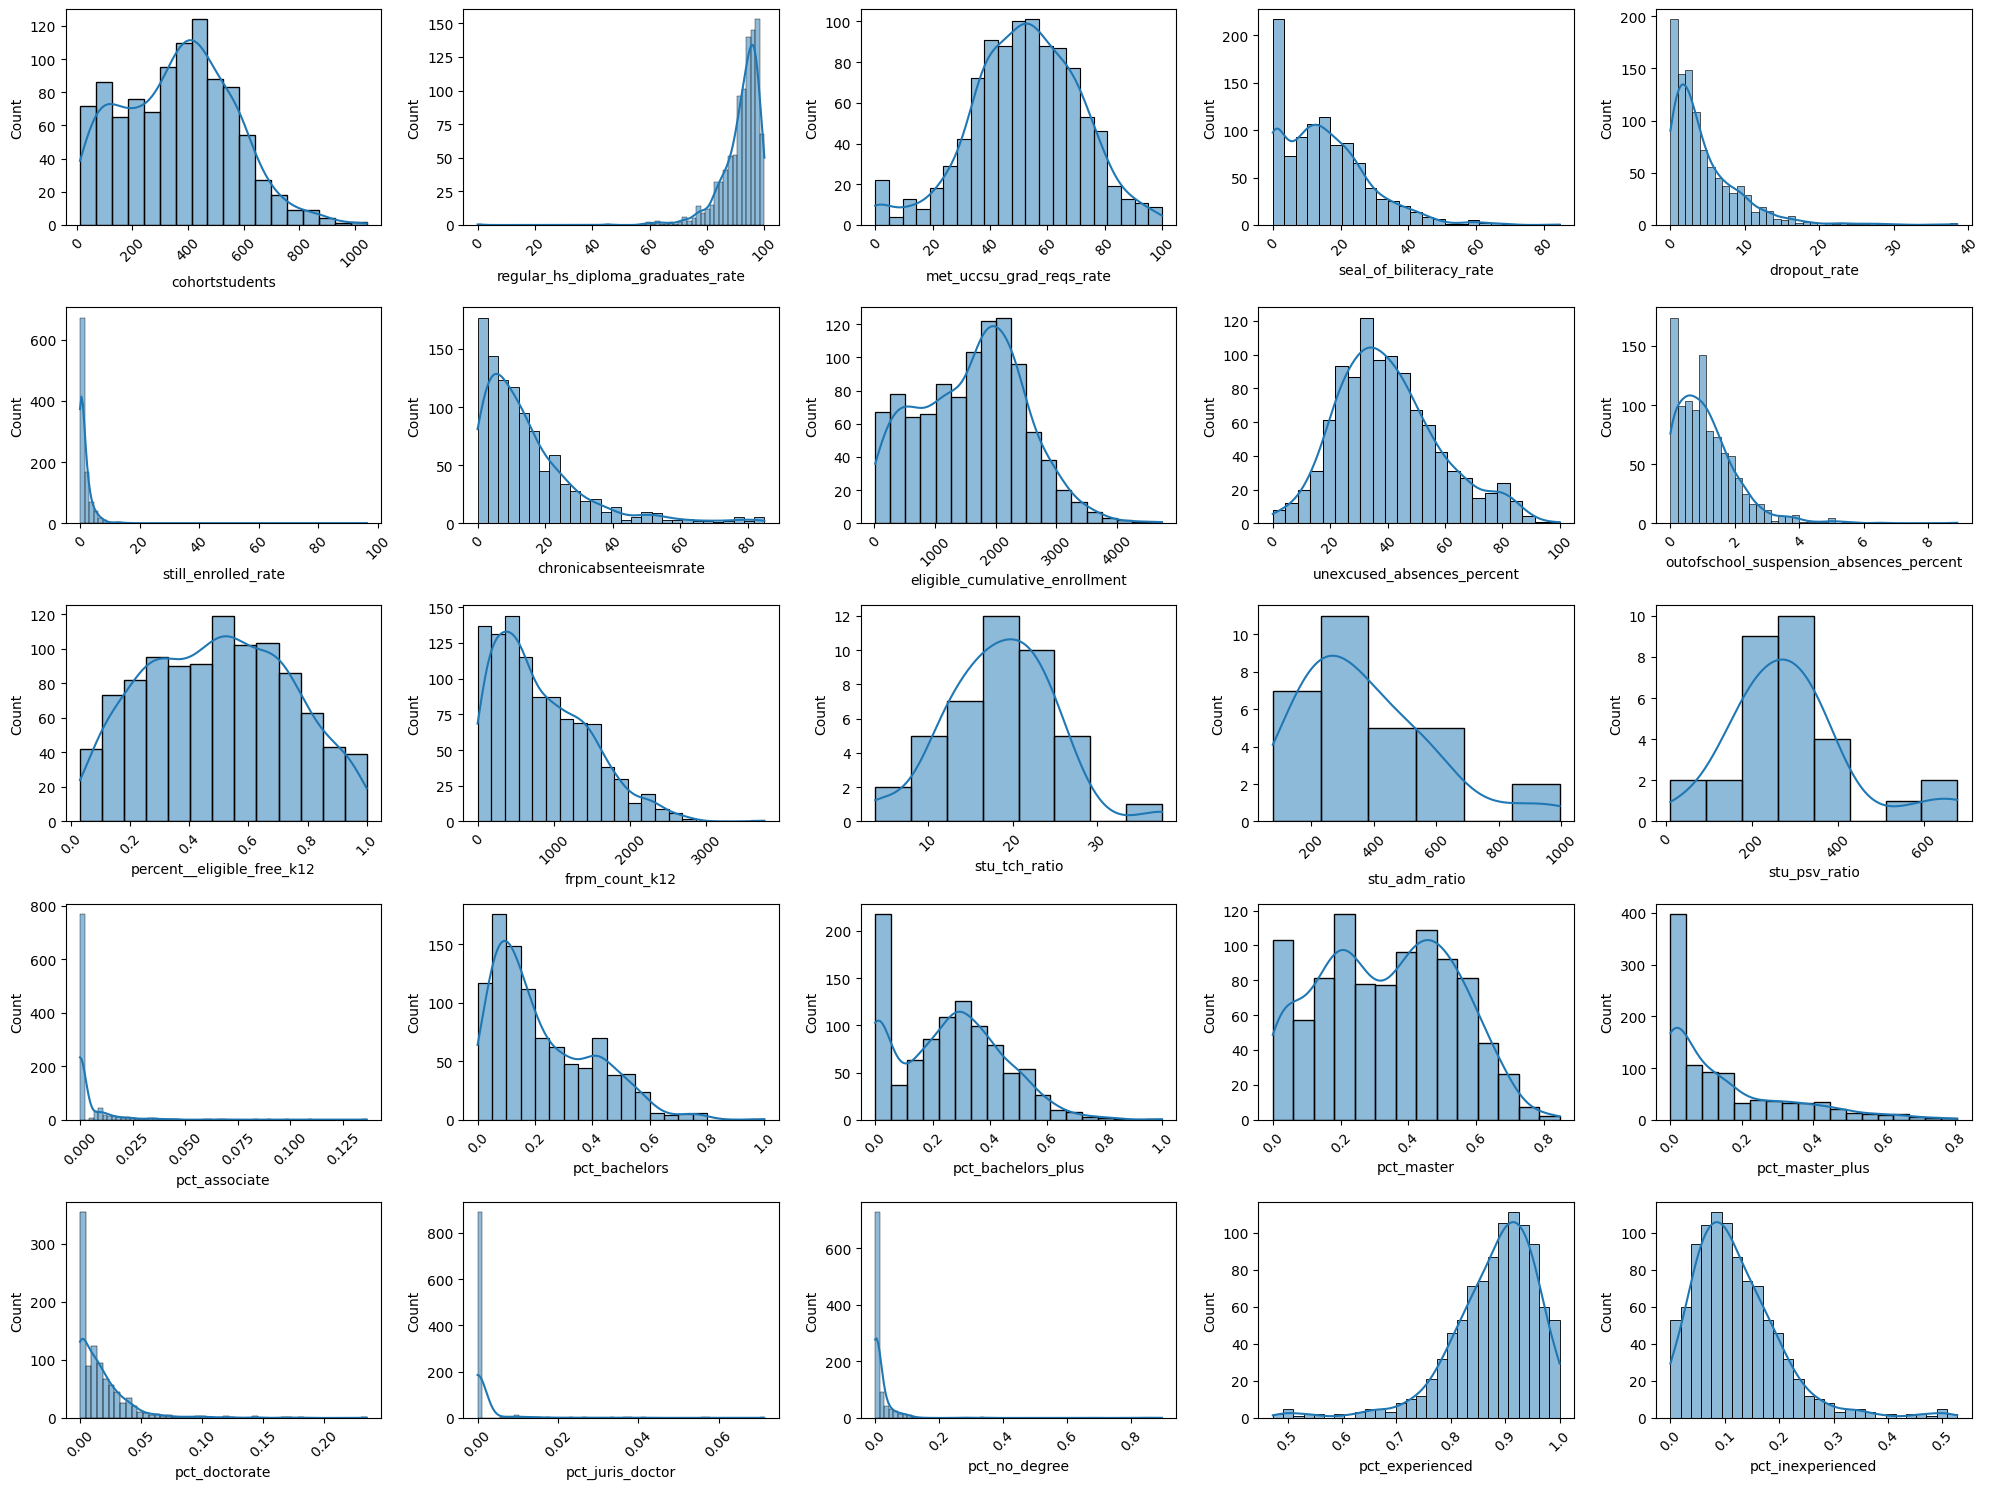

In [95]:
# 
n_cols = 5
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols[: n_cols * n_rows]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

## Categorical Features

In [96]:
df[cat_cols].describe()

,virtual,magnet,yearroundyn,multilingual
count,1067,1067,1067,1067
unique,3,3,2,3
top,N,N,N,N
freq,676,937,1014,919


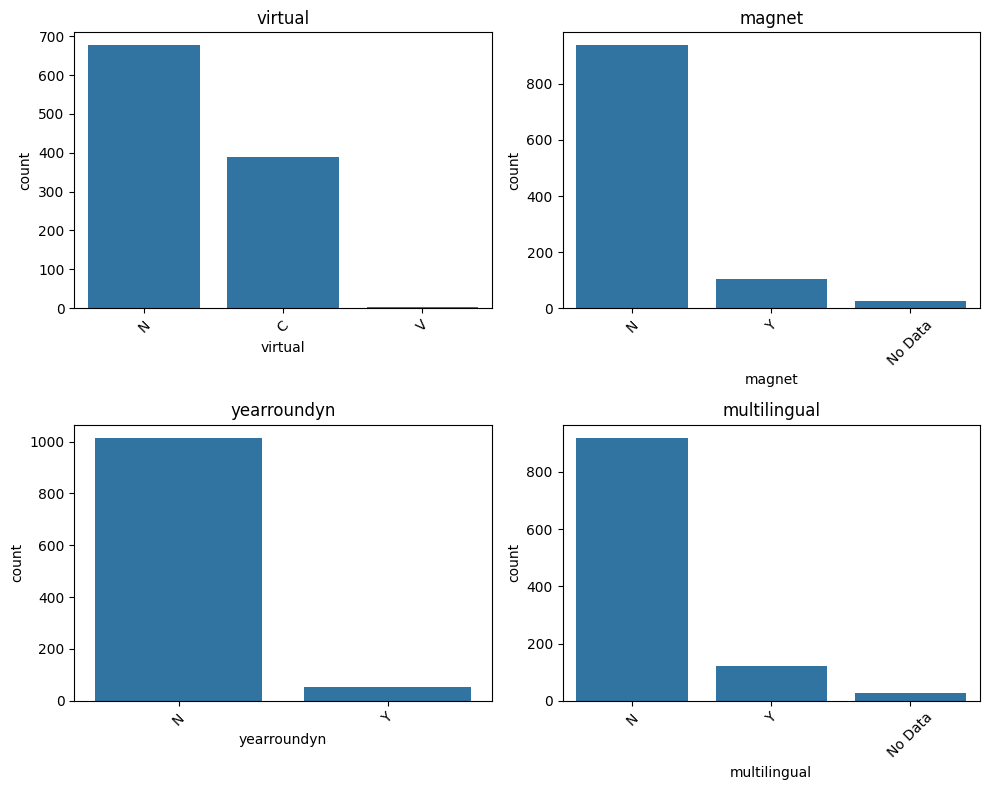

In [101]:
n_cols = 2
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()